In [17]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [18]:
yf.__version__

'0.2.61'

In [19]:
msft = yf.Ticker("MSFT")
msft_data = msft.history(period = "3y")
msft_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-05-24 00:00:00-04:00,251.510159,254.865030,247.228747,253.197342,29043900,0.0,0.0
2022-05-25 00:00:00-04:00,251.753924,258.034579,250.768901,256.025543,28547900,0.0,0.0
2022-05-26 00:00:00-04:00,255.781848,260.502110,254.962631,259.322052,25002100,0.0,0.0
2022-05-27 00:00:00-04:00,261.838154,266.577909,260.940900,266.480377,26910800,0.0,0.0
2022-05-31 00:00:00-04:00,265.787994,267.972570,262.277047,265.144318,37827700,0.0,0.0


In [20]:
msft_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2022-05-24 00:00:00-04:00 to 2025-05-23 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          753 non-null    float64
 1   High          753 non-null    float64
 2   Low           753 non-null    float64
 3   Close         753 non-null    float64
 4   Volume        753 non-null    int64  
 5   Dividends     753 non-null    float64
 6   Stock Splits  753 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 47.1 KB


#### Preprocessing 

In [21]:
msft_data.index = msft_data.index.date
msft_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2022-05-24,251.510159,254.865030,247.228747,253.197342,29043900,0.0,0.0
2022-05-25,251.753924,258.034579,250.768901,256.025543,28547900,0.0,0.0
2022-05-26,255.781848,260.502110,254.962631,259.322052,25002100,0.0,0.0
2022-05-27,261.838154,266.577909,260.940900,266.480377,26910800,0.0,0.0
2022-05-31,265.787994,267.972570,262.277047,265.144318,37827700,0.0,0.0


In [22]:
msft_data = msft_data.drop(["Dividends", "Stock Splits"], axis=1)


#### Visualizations

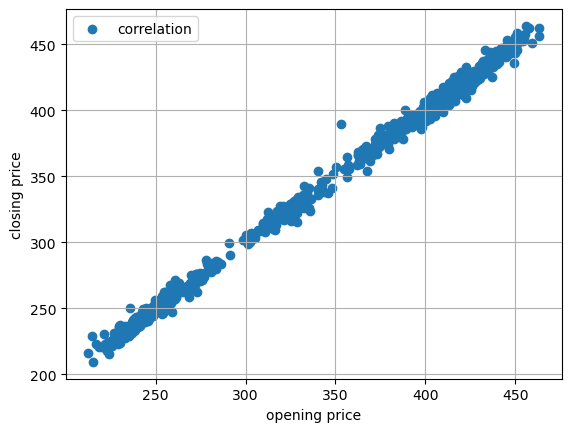

In [23]:
# correlation between opening price and closing price

plt.scatter(x=msft_data["Open"], y=msft_data["Close"], label = "correlation")
plt.xlabel("opening price")
plt.ylabel("closing price")
plt.legend()
plt.grid(True)
plt.show()

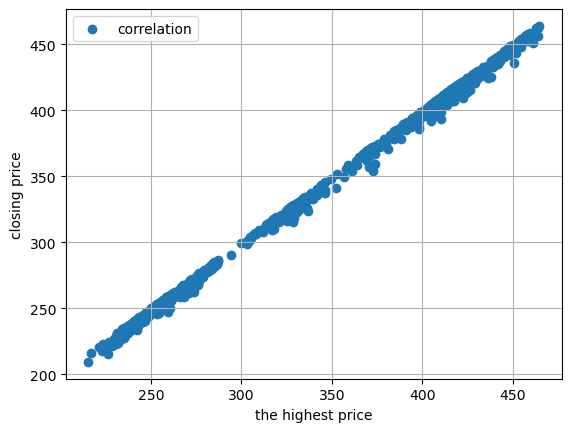

In [24]:
plt.scatter(x=msft_data["High"], y=msft_data["Close"], label = "correlation")
plt.xlabel("the highest price")
plt.ylabel("closing price")
plt.legend()
plt.grid(True)
plt.show()

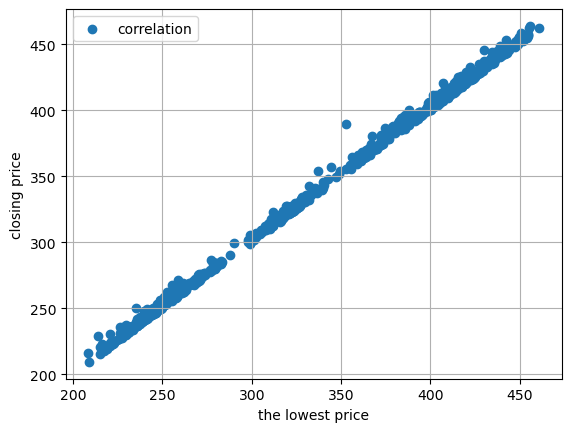

In [37]:
plt.scatter(x=msft_data["Low"], y=msft_data["Close"], label = "correlation")
plt.xlabel("the lowest price")
plt.ylabel("closing price")
plt.legend()
plt.grid(True)
plt.show()

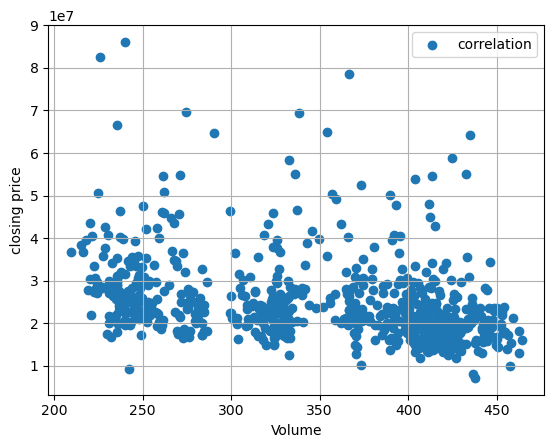

In [51]:
plt.scatter(x=msft_data["Close"], y=msft_data["Volume"], label = "correlation")
plt.xlabel("Volume")
plt.ylabel("closing price")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# learning moving average

msft_data["MA of 7 for closing"] = msft_data["Close"].rolling(window=7).mean()
msft_data["MA of 15 for closing"] = msft_data["Close"].rolling(window=15).mean()
msft_data["MA of 30 for closing"] = msft_data["Close"].rolling(window=30).mean()
msft_data.head(20)


,Open,High,Low,Close,Volume,MA of 7 for closing,MA of 15 for closing,MA of 30 for closing
2022-05-24,251.510159,254.865030,247.228747,253.197342,29043900,NaN,NaN,NaN
2022-05-25,251.753924,258.034579,250.768901,256.025543,28547900,NaN,NaN,NaN
2022-05-26,255.781848,260.502110,254.962631,259.322052,25002100,NaN,NaN,NaN
2022-05-27,261.838154,266.577909,260.940900,266.480377,26910800,NaN,NaN,NaN
2022-05-31,265.787994,267.972570,262.277047,265.144318,37827700,NaN,NaN,NaN
2022-06-01,268.391981,270.820373,263.359628,265.680756,25292200,NaN,NaN,NaN
2022-06-02,257.907948,267.855598,255.128446,267.787323,44008200,261.948244,NaN,NaN
2022-06-03,263.622891,266.685226,261.769901,263.340057,28059000,263.397204,NaN,NaN
2022-06-06,265.329614,267.397164,260.609353,262.101501,22400300,264.265198,NaN,NaN
2022-06-07,260.043740,266.373178,259.361045,265.758759,22860700,265.184727,NaN,NaN


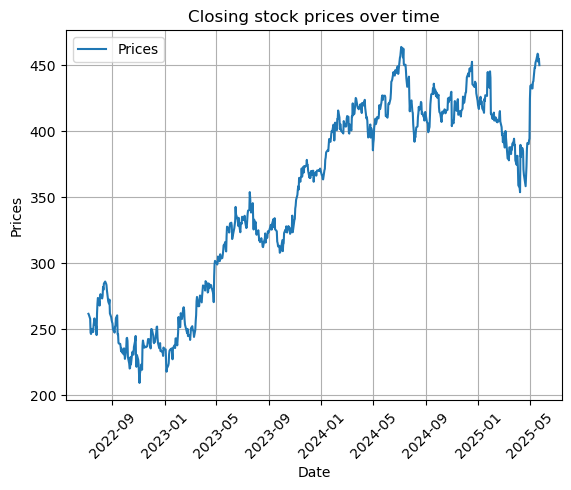

In [52]:
plt.plot(msft_data.index,msft_data['Close'], label="Prices")
plt.title("Closing stock prices over time")
plt.xlabel("Date")
plt.ylabel("Prices")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


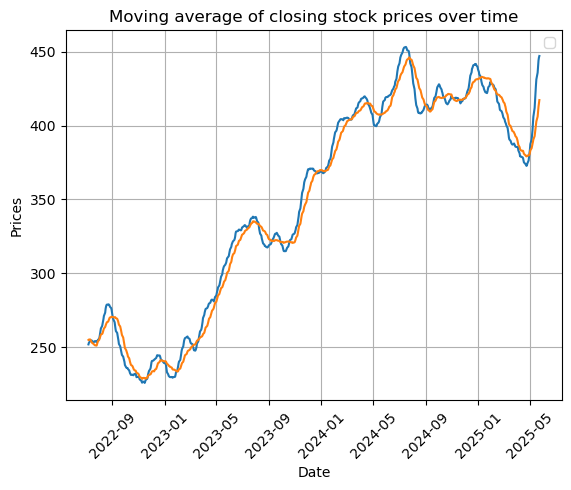

In [53]:
plt.plot(msft_data.index,msft_data["MA of 15 for closing"])
plt.plot(msft_data.index,msft_data["MA of 30 for closing"])
plt.title("Moving average of closing stock prices over time")
plt.xlabel("Date")
plt.ylabel("Prices")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# daily return 

msft_data_close = msft_data[['Close']]
msft_data_close["Daily return"] = msft_data_close["Close"].pct_change()
msft_data_close.head()

C:\Users\Nazik\AppData\Local\Temp\ipykernel_3848\3168057537.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msft_data_close["Daily return"] = msft_data_close["Close"].pct_change()


,Close,Daily return
2022-05-24,253.197357,NaN
2022-05-25,256.025574,0.011170
2022-05-26,259.321991,0.012875
2022-05-27,266.480408,0.027604
2022-05-31,265.144318,-0.005014


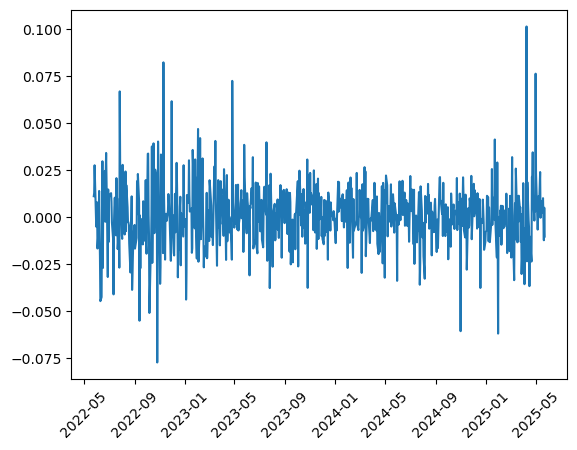

In [35]:
plt.plot(msft_data_close.index, msft_data_close["Daily return"])
plt.xticks(rotation=45)
plt.show()

#### Making Predictions

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
msft_data = msft_data.dropna()
msft_data.head()

,Open,High,Low,Close,Volume,MA of 7 for closing,MA of 15 for closing,MA of 30 for closing
2022-07-07,258.561306,262.403838,258.463774,261.760162,20859900,255.046180,251.832654,254.857590
2022-07-08,258.239457,261.467570,256.776565,261.038452,19658800,256.603806,252.866430,255.118961
2022-07-11,259.078152,259.936387,255.693994,257.966370,19455200,257.195925,254.136869,255.183655
2022-07-12,259.302526,259.361040,245.804896,247.394577,35868500,256.755670,254.528277,254.786072
2022-07-13,244.000668,247.277547,241.972123,246.468079,29497400,255.799916,254.461960,254.118996


In [48]:
# features and target

X = msft_data[["Open", "Low", "High", "Volume", "MA of 30 for closing"]]
Y = msft_data["Close"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

predictions = model.predict(X_test)

In [50]:

mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 3.0541108740204153
R² Score: 0.9994334737401023


### Evaluations

| Metric                             | Value      | Interpretation                                                                  |
| ---------------------------------- | ---------- | ------------------------------------------------------------------------------- |
| **Mean Squared Error (MSE)**       | 3.05       | On average, the squared difference between predicted and actual prices is 3.05. |
| **Root Mean Squared Error (RMSE)** | ≈ **1.75** | The typical error between predictions and actual prices is about **\$1.75**.    |
| **R² Score**                       | **0.9994** | The model explains **99.94%** of the variance in the closing prices.            |
